In [1]:
!pip3 install box2d-py==2.3.8

     |████████████████████████████████| 450kB 32.5MB/s 


In [2]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import base64
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam 
from keras.models import load_model, Model
import keras.backend as K
from collections import deque
from IPython import display as ipythondisplay

Using TensorFlow backend.


In [0]:
class A(object):
  def __init__(self,Alpha,Beta, Gamma, n_actions, 
               layer1_size,layer2_size, input_dims):
    self.gamma = Gamma
    self.learning_rate = Alpha
    self.Beta = Beta
    self.input_dims = input_dims
    self.layer1_size = layer1_size
    self.layer2_size = layer2_size
    self.n_actions= n_actions

    self.actor, self.critic, self.policy = self.building_actor_critic()
    self.action_space= [i for i in range (self.n_actions)]

  def building_actor_critic(self):
    frames_input = Input(shape =(self.input_dims,))
    advantages = Input(shape=[1])
    hidden1 =Dense(self.layer1_size,activation = 'relu')(frames_input)#buildingnueralnetwork
    hidden2 =Dense(self.layer2_size,activation = 'relu')(hidden1)
    output_F = Dense(self.n_actions,activation='softmax')(hidden2)
    values = Dense(1,activation = 'linear')(hidden2)

    def loss(y_true,y_pred): #-log-likelihood
      out = K.clip(y_pred,1e-8,1-1e-8)
      log_lik = y_true*K.log(out)
      return K.sum(-log_lik*advantages)
    
    actor = Model(input=[frames_input,advantages], output =[output_F])#
    actor.compile(optimizer=Adam(lr=self.learning_rate),loss=loss)

    critic = Model(input=[frames_input],output=[values])
    critic.compile(optimizer=Adam(lr=self.Beta),loss='mean_squared_error')

    policy = Model(input= [frames_input],output = [output_F])
    return actor, critic, policy

  def choose_action(self, observation):#actionspace
    state = observation[np.newaxis, :]
    probabilities = self.policy.predict(state)[0]
    action = np.random.choice(self.action_space, p= probabilities)
    return action
  
  def learn(self,state,action,reward,state_,done):#agent_learning_alg
    state = state[np.newaxis, :]
    state_ = state_[np.newaxis, :]
    critic_value_ = self.critic.predict(state_)
    critic_value = self.critic.predict(state)

    target = reward + self.gamma*critic_value_*(1-int(done))
    advantages = target - critic_value

    actions = np.zeros([1,self.n_actions])
    actions[np.arange(1),action] = 1

    self.actor.fit([state, advantages], actions, verbose = 0)
    self.critic.fit(state, target, verbose = 0)


In [0]:
 def main():
  env = gym.make('Acrobot-v1')
  trials  = 1000
  total_rewards = []
  episode= 0
  agent = A(Gamma=0.99,Alpha=0.00001, Beta = 0.00005,n_actions = 3,layer1_size = 1024,
            layer2_size = 512,input_dims = 6)#setting_hyperparameters

  for trail in range(trials):
    observation = env.reset()
    total_reward = 0
    done= False

    while not done:
      action = agent.choose_action(observation)
      observation_,reward,done,_ = env.step(action)
      agent.learn(observation,action,reward,observation_,done)
      observation = observation_
      total_reward +=reward
    total_rewards.append(total_reward)
    print('Trial number',trail)
    print('Trial Reward',total_reward)
  return total_rewards

In [8]:
if __name__ == "__main__":
  total_rewards = main()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Trial number 0
Trial Reward -500.0
Trial number 1
Trial Reward -500.0
Trial number 2
Trial Reward -500.0
Trial number 3
Trial Reward -500.0
Trial number 4
Trial Reward -500.0
Trial number 5
Trial Reward -500.0
Trial number 6
Trial Reward -500.0
Trial number 7
Trial Reward -500.0
Trial number 8
Trial Reward -500.0
Trial number 9
Trial Reward -500.0
Trial number 10
Trial Reward -500.0
Trial number 11
Trial Reward -500.0
Trial number 12
Trial Reward -500.0
Trial number 13
Trial Reward -500.0
Trial number 14
Trial Reward -500.0
Trial number 15
Trial Reward -282.0
Trial number 16
Trial Reward -173.0
Trial number 17
Trial Reward -168.0
Trial number 18
Trial Reward -170.0
Trial number 19
Trial Reward -178.0
Trial number 20
Trial Reward -138.0
Trial number 21
Trial Reward -106.0
Trial number 22
Trial Reward -133.0
Trial number 23
Trial Reward -124.0
Trial number 24
Trial Reward -119.0
Trial number 25
Trial Reward -99.0
Trial number 26
Trial Reward -81.0
Trial number 27
Trial Reward -164.0
Tria

[-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -282.0, -173.0, -168.0, -170.0, -178.0, -138.0, -106.0, -133.0, -124.0, -119.0, -99.0, -81.0, -164.0, -78.0, -170.0, -82.0, -106.0, -82.0, -94.0, -89.0, -99.0, -174.0, -122.0, -118.0, -96.0, -112.0, -100.0, -124.0, -171.0, -500.0, -86.0, -179.0, -95.0, -90.0, -165.0, -108.0, -86.0, -118.0, -84.0, -89.0, -76.0, -86.0, -101.0, -101.0, -99.0, -217.0, -94.0, -108.0, -86.0, -75.0, -77.0, -88.0, -82.0, -84.0, -84.0, -92.0, -77.0, -90.0, -100.0, -90.0, -114.0, -83.0, -88.0, -93.0, -92.0, -115.0, -76.0, -81.0, -109.0, -160.0, -84.0, -85.0, -106.0, -110.0, -125.0, -87.0, -83.0, -100.0, -146.0, -96.0, -81.0, -98.0, -110.0, -103.0, -81.0, -90.0, -95.0, -104.0, -81.0, -87.0, -80.0, -105.0, -91.0, -116.0, -104.0, -73.0, -86.0, -90.0, -97.0, -84.0, -105.0, -110.0, -75.0, -83.0, -92.0, -108.0, -88.0, -85.0, -85.0, -81.0, -86.0, -95.0, -64.0, -111.0, -89.0, -109.0, -81.0, -125.0, -9

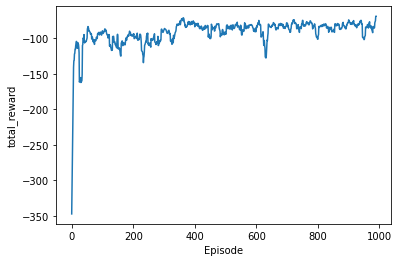

In [9]:
window = 10
plt.xlabel('Episode')
plt.ylabel('total_reward')
plt.plot([np.mean(total_rewards[tr:tr+window]) for tr in range(window, len(total_rewards))])
print(total_rewards)